In [3]:
import pandas as pd
import functools

In [4]:
survey = pd.read_csv("survey_results_public.csv")

In [5]:
survey['Ethnicity']

0        White or of European descent
1                                 NaN
2                                 NaN
3        White or of European descent
4        White or of European descent
                     ...             
64456                             NaN
64457                             NaN
64458                             NaN
64459                             NaN
64460                             NaN
Name: Ethnicity, Length: 64461, dtype: object

In [6]:
#getting comp avergaes
def average_salary(entry, salary):
 
    return salary + entry

allSalaries = survey[survey['ConvertedComp'].notna()]
globalComps = functools.reduce(average_salary, allSalaries['ConvertedComp'], 0.0)
globalAverageComps = globalComps/len(allSalaries.index)
globalAverageComps

103756.05014961446

In [9]:
#getting non poc rows whehre comp is given
#need to bhe optimised this was done in a rush
nonPOCloc = survey['Ethnicity'] == "White or of European descent"
nonPOC = survey[nonPOCloc]
forWhiteSalary = nonPOC[nonPOC['ConvertedComp'].notna()]

In [11]:
#getting average non POC compensation
totalWhiteComps = functools.reduce(average_salary, forWhiteSalary['ConvertedComp'], 0.0)
averageWhiteComp = totalWhiteComps/len(forWhiteSalary.index)
averageWhiteComp

119493.95560122348

In [12]:
#Getting average POC compensation
pocComps = allSalaries[allSalaries['Ethnicity'] != "White or of European descent"]
averagePOCComps = functools.reduce(average_salary, pocComps['ConvertedComp'], 0.0)
averagePOCComps = averagePOCComps/len(pocComps.index)
averagePOCComps

79948.94100636206

In [13]:
# global average working hours
workHoursdf = survey[survey['WorkWeekHrs'].notna()]
globalAvgWork = functools.reduce(lambda x,y: x+y, workHoursdf['WorkWeekHrs'], 0)
globalAvgWork = globalAvgWork/len(workHoursdf.index)
globalAvgWork

40.782173999014546

In [16]:
#getting non POC average work hours
whiteHoursdf = workHoursdf[workHoursdf['Ethnicity'] == "White or of European descent"]
whiteWorkHours = functools.reduce(lambda x,y: x+y, whiteHoursdf['WorkWeekHrs'], 0)
whiteWorkHours = whiteWorkHours/len(whiteHoursdf.index)
whiteWorkHours

40.93628765269704

In [17]:
#gettign average POC work hours
pocWorkHoursdf = workHoursdf[workHoursdf['Ethnicity'] != "White or of European descent"]
pocHours = functools.reduce(lambda x,y: x+y, pocWorkHoursdf['WorkWeekHrs'], 0)
pocHours = pocHours/len(pocWorkHoursdf.index)
pocHours

40.57562278903189

In [18]:
#getting amounts of entries looked at
print(f"Amount of developers salaries looked at: {len(allSalaries.index)}")
print(f"Non-POC salaries looked at:              {len(forWhiteSalary.index)}")
print(f"POC salaries looked at:                  {len(pocComps.index)}")

print("\n")

print(f"Amount of developers work hours looked at: {len(workHoursdf.index)}")
print(f"Non-POC work hours looked at:              {len(whiteHoursdf.index)}")
print(f"POC work hours looked at:                  {len(pocWorkHoursdf.index)}")

Amount of developers salaries looked at: 34756
Non-POC salaries looked at:              20924
POC salaries looked at:                  13832


Amount of developers work hours looked at: 41151
Non-POC work hours looked at:              23567
POC work hours looked at:                  17584


Based on the data we werea able to get. POC and Non-POC developers seem to work very similar hours. Averaging a basic 40 hour work week.
The big difference comes in the average salaries. POC developers made about $40,000 less than non-POC. This is a very big difference considering they work about the same amount fo hours.
Need to keep in mind however, only about half of the devlopers were screened for each question, the rest didnt want to share. this could bridge the gap between the work hours, but there is no doubt about the difference in salary.

More research needs to be made about different factors such as position worked and the location each developer works in.

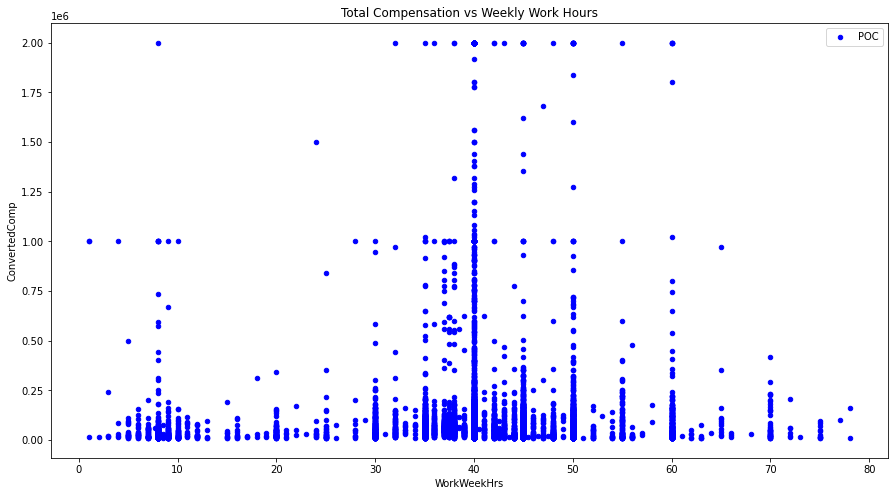

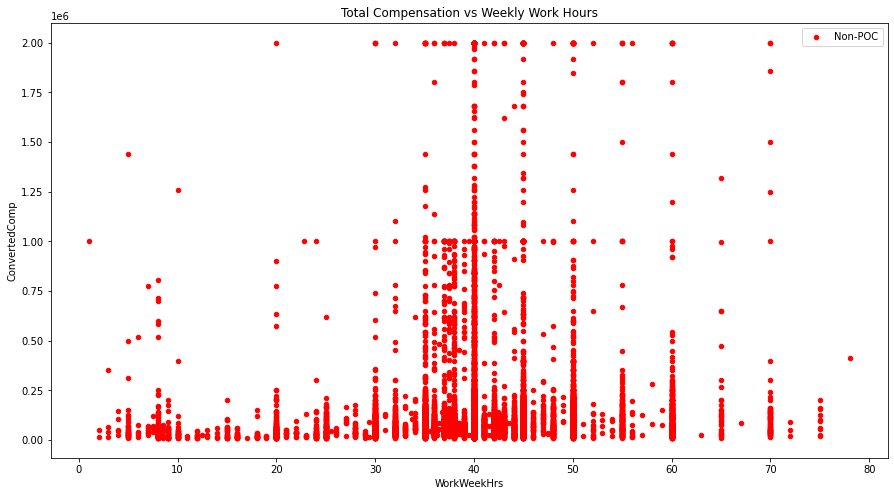

In [53]:
import matplotlib.pyplot as plt

#Filtering and cleaning survey to our needs and to remove unneccesary data
filteredSurvey = survey[survey['WorkWeekHrs'].notna() & survey['ConvertedComp'].notna()]
#Added limitations to deal with outlires
filteredSurvey = filteredSurvey[(filteredSurvey['WorkWeekHrs']<80) & (filteredSurvey['ConvertedComp']>10000)]

#Plotting POC
pocValues = filteredSurvey[filteredSurvey['Ethnicity']  != "White or of European descent"]

ax1=pocValues.plot(kind='scatter', figsize=(15,8), x="WorkWeekHrs",y="ConvertedComp", color = 'b', label="POC", title="Total Compensation vs Weekly Work Hours")


#Plotting non-POC
whiteValues = filteredSurvey[filteredSurvey['Ethnicity']  == "White or of European descent"]

whiteValues.plot(kind='scatter', figsize=(15,8), x="WorkWeekHrs",y="ConvertedComp",color = 'r', label = "Non-POC", title="Total Compensation vs Weekly Work Hours")
plt.legend()



The gives an insight into our previously found results for the average compensations and work horus of POC adn Non-POC developers.
We can see that their is a substantial difference between the amount developers observed for each category. Their is almost double the amount of non-POC developers, which could be a reason for the difference in compensation averages. We also see however, that there is a very slight right skew to these distributions though they are fairly normally distributed. We also see that the Non-POC points are also more abundant in the average area of 35 hours and around 75-100k compensation. And though only by a little bit, the non-POC are lisghtly more abundant in the bottom left hand corner of the graph indicating the least amoutn fo work hours and least compensation. 
This may give insight into the hobbies of POC vs non-POC as the lower end compensation workers may see programmiugn as more ofa  hobby and therefore dont care to work long hours or get more pay.